[Exercise at bottom](#Exercises)

## Learning outcomes
1. Load, display and save images
2. Load, show and save videos
3. Image resizing

## Why OpenCV?
- Compatible with multiple major OS, like Windows, MacOs, Linux. Written in C++, Python and Java.
- Interoperable with Numpy, thereby facilitate fast computation of image arrays.
- Large community support, a lot of articles, stackoverflow posts regarding OpenCV.

## Image formats
- JPEG (.jpg, .jpeg, .jfif)
    * photos, smaller file size compared to png
- PNG (.png)
    * website or file transfer
- tiff (.tif)
    * used for printing (high quality), larger file size
- bitmap (.bmp)
    * large file size
- gif (.GIF, OpenCV can't deal with GIF)
    * support animation, shallow color depth
- webp (.webp)
    * used for file transfer, not supported by IE

## Load and show images

In [1]:
# !pip install opencv-contrib-python

In [2]:
import sys
# at least Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

In [3]:
img = cv.imread("images/lena.jfif")

# second argument: 1(default, read color image), 0(grayscale), -1(cv.IMREAD_UNCHANGED)
grayscale = cv.imread("images/lena.jfif", 0) 

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0) # key binding function: wait for user input
cv.destroyAllWindows()

In [4]:
def show_img(window_name, img):
    """2 arguments: window name and image"""
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [5]:
img = cv.imread("images/lena.png")

show_img("image", img)

How about GIF?

In [6]:
import imageio

In [7]:
# GIF
GIF = imageio.mimread("images/rotating_earth_large.gif")

# convert RGB to BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150)

cv.destroyAllWindows()

In [8]:
img_jpeg = cv.imread("images/lena.jfif", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpeg: {img_jpeg.shape}")
print(f"The shape of png: {img_png.shape}")

The shape of jpeg: (225, 225, 3)
The shape of png: (225, 225, 4)


## Save image
```
cv.imwrite(filepath, img)
```

In [9]:
# formalized way to load, show and save image
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("lena", img)
k = cv.waitKey(0) & 0xFF

if k == ord('s'):  # 's' key
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()

## video operations with OpenCV

In [10]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame detected!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27: # Esc key
        break

cap.release()
cv.destroyAllWindows()

## Webcam
save video captured by webcam

In [11]:
cap = cv.VideoCapture(0)  # 0 for webcame capture

if not cap.isOpened():
    sys.exit("No webcam")
    
# parameters: filepath, fourcc, fps, frame width and height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4)) 

out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame detected!")
        break
    
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

SystemExit: No webcam

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
import time

In [13]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame detected!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

end = time.time()
# cap.release()
cv.destroyAllWindows()

In [14]:
print(f"The fps using the media player: {cap.get(5)}")
total_frame = cap.get(7)
print(f"The fps with OpenCV: {total_frame / (end - start)}")

The fps using the media player: 60.0
The fps with OpenCV: 1826.8559290470093


## resizing 
2 methods to perform resizing:
1. set arbitrary sizes
2. scale factor

In [15]:
# method 1: set any dimension you prefer
img = cv.imread("images/soccer.jpg")

# parameters: source image, dimension, fx, fy, interpolation methods
new_height = 450
new_width = 300
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
img.shape

(1200, 800, 3)

In [17]:
# method 2: scale factor
img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

cv.waitKey(0)
cv.destroyAllWindows()

## Exercises
1. Load and display the image 'dog.jfif'. Save the image in png format.
2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following: 
  * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
  * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4" 
4. Enlarge the image "dog.jfif" by using different techniques: 1) Linear interpolation, 2) Cubic interpolation and 3) nearest neighbor interpolation. Comment on the upscaled of all the outputs.
 

In [18]:
import sys
# at least Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

Exercise 1

In [19]:
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("dog", img)
k = cv.waitKey(0) & 0xFF
if k == ord('s'):
    cv.imwrite("images/dog.png", img)
    
cv.destroyAllWindows()

Exercise 2

In [20]:
# method 1: call cv.imshow() twice
img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("COLOR", img)
show_img("grayscale", grayscale)

In [21]:
# method 2: use matplotlib module
import matplotlib.pyplot as plt

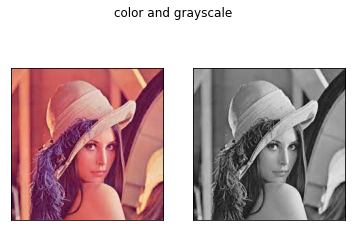

In [22]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color and grayscale")
plt.show()

In [23]:
# method 3: cv.imshow() or plt
grayscale = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack((img, grayscale))

show_img("color vs grayscale", img_combined)

Exercise 3

In [24]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("Video not found")

# set a scale for the resized frame
SCALE_FACTOR = 0.3

fourcc = cv.VideoWriter_fourcc(*'mp4v')
w, h = int(cap.get(3) * SCALE_FACTOR), int(cap.get(4) * SCALE_FACTOR)

out = cv.VideoWriter("smaller_img_pexels.mp4", fourcc, 20, (w, h))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("No frame detected!")
        break
        
    frame_resize = cv.resize(frame, None, fx=SCALE_FACTOR, fy=SCALE_FACTOR, interpolation=cv.INTER_AREA)
    out.write(frame_resize)
    cv.imshow("video", frame_resize)
    
    # exit if any key is pressed
    if cv.waitKey(1) != -1:
        break

cap.release()
out.release()
cv.destroyAllWindows()

Exercise 4

In [25]:
def enlarge_img(window_name, interpolation=cv.INTER_LINEAR):
    """2 arguments: Window name and interpolation flag [optional]"""
    # using nearest neighbour interpolation
    img = cv.imread("images/dog.jfif")

    if img is None:
        sys.exit("Cannot find image file")

    scale = 1.5
    img_resize = cv.resize(img, None, fx=scale, fy=scale, interpolation=interpolation)
    
    cv.imshow(window_name, img_resize)

In [26]:
# Using linear interpolation
# a balance between performance and image quality
enlarge_img("dog linear")

# Using cubic interpolation
# slowest performance but with highest image quality
enlarge_img("dog cubic", cv.INTER_CUBIC)

# using nearest neighbour interpolation
# fastest performance but with the lowest image quality
enlarge_img("dog nearest_neighbour", cv.INTER_NEAREST)

cv.waitKey(0)
cv.destroyAllWindows()